In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("penguins.csv")
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [47]:
# Checking are removing the Null values

In [6]:
df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
features = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]

In [46]:
# Converting Male and Female into Binary

In [9]:
df_dum = pd.get_dummies(df, columns = ['sex'], drop_first=True)

In [10]:
df_dum = df_dum.drop("sex_MALE", axis = 1)

In [11]:
df_dum.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,0


In [48]:
# Checking are removing the Outliers

In [12]:
df_dum.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE
count,335.000000,335.000000,335.000000,335.000000,335.000000
mean,43.988358,17.169552,214.355224,4209.179104,0.492537
std,5.453430,1.971966,263.253508,803.633495,0.500692
min,32.100000,13.100000,-132.000000,2700.000000,0.000000
25%,39.500000,15.600000,190.000000,3550.000000,0.000000
50%,44.500000,17.300000,197.000000,4050.000000,0.000000
75%,48.550000,18.700000,213.000000,4787.500000,1.000000
max,59.600000,21.500000,5000.000000,6300.000000,1.000000


In [13]:
df_dum["flipper_length_mm"].value_counts()

 190.0     21
 195.0     17
 187.0     16
 210.0     14
 193.0     14
 191.0     13
 215.0     12
 197.0     10
 196.0     10
 185.0      9
 220.0      8
 208.0      8
 212.0      7
 230.0      7
 198.0      7
 192.0      7
 181.0      7
 189.0      7
 184.0      7
 201.0      6
 188.0      6
 216.0      6
 213.0      6
 217.0      6
 186.0      6
 199.0      6
 222.0      6
 214.0      5
 219.0      5
 218.0      5
 221.0      5
 209.0      5
 203.0      5
 194.0      5
 228.0      4
 200.0      4
 180.0      4
 178.0      4
 225.0      4
 202.0      4
 205.0      3
 224.0      3
 182.0      3
 183.0      2
 211.0      2
 223.0      2
 207.0      2
 229.0      2
 231.0      1
 176.0      1
 174.0      1
 5000.0     1
-132.0      1
 206.0      1
 172.0      1
 226.0      1
Name: flipper_length_mm, dtype: int64

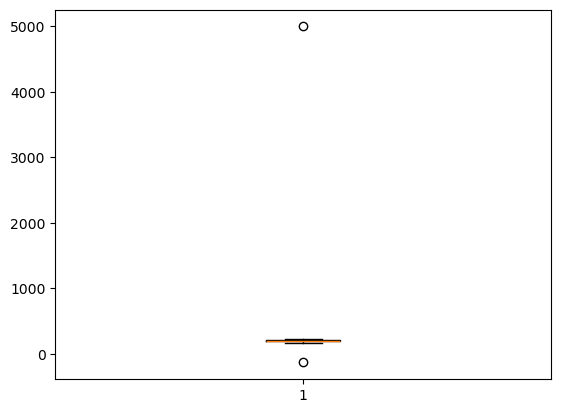

In [14]:
plt.boxplot(df_dum["flipper_length_mm"]);

In [15]:
df_dum["flipper_length_mm"] = df_dum["flipper_length_mm"].replace(5000, df_dum["flipper_length_mm"].mean())

In [16]:
df_dum["flipper_length_mm"] = df_dum["flipper_length_mm"].replace(-132, df_dum["flipper_length_mm"].mean())

In [17]:
df = df_dum

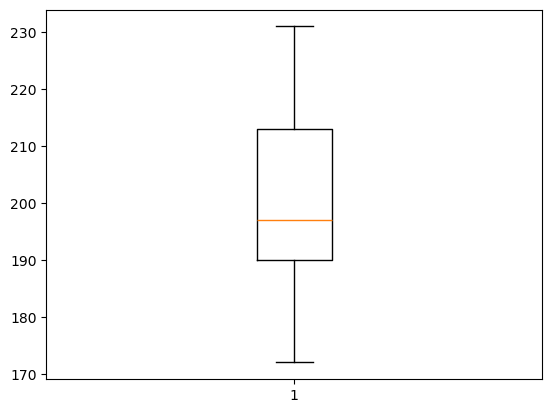

In [18]:
plt.boxplot(df["flipper_length_mm"]);

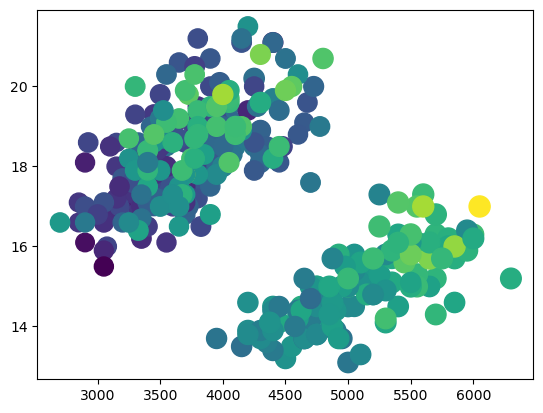

In [19]:
plt.scatter(df["body_mass_g"], df["culmen_depth_mm"], df["flipper_length_mm"], df["culmen_length_mm"],)

In [35]:
# Putting everything on same scale

In [20]:
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [21]:
df = pd.DataFrame(df)
df.head()

,0,1,2,3,4
0,-0.897723,0.777263,-1.433101,-0.572233,-0.985184
1,-0.824265,0.117037,-1.075915,-0.509923,1.015038
2,-0.677349,0.421757,-0.432979,-1.195338,1.015038
3,-1.338472,1.081983,-0.575854,-0.946096,1.015038
4,-0.860994,1.742210,-0.790166,-0.696854,-0.985184


In [22]:
X = df.iloc[:, 0:6].values

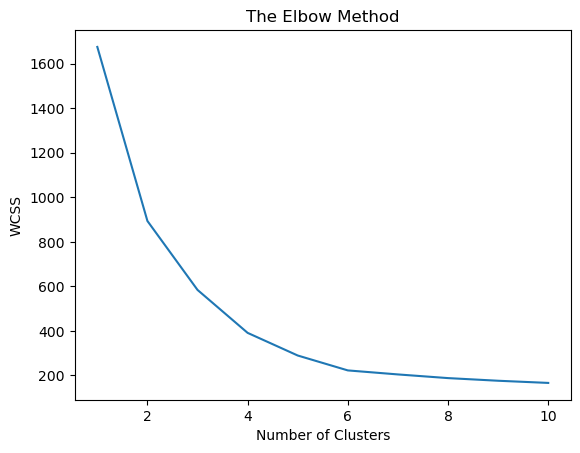

In [36]:
# Using the Elbow Method
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show();

### Training the K-Means

In [24]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [25]:
y_kmeans

array([2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0,
       2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 3, 1, 3, 1, 1,
       3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 1,
       3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 1,
       3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,

In [26]:
df["cluster"] = y_kmeans
df.head()

,0,1,2,3,4,cluster
0,-0.897723,0.777263,-1.433101,-0.572233,-0.985184,2
1,-0.824265,0.117037,-1.075915,-0.509923,1.015038,0
2,-0.677349,0.421757,-0.432979,-1.195338,1.015038,0
3,-1.338472,1.081983,-0.575854,-0.946096,1.015038,0
4,-0.860994,1.742210,-0.790166,-0.696854,-0.985184,2


Text(0, 0.5, 'culmen_depth_mm')

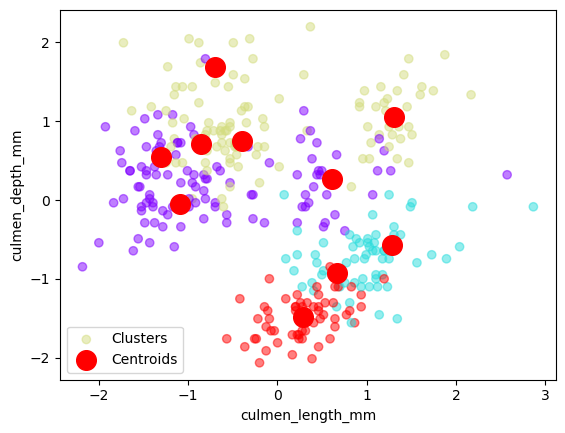

In [42]:
plt.scatter(df[0], df[1], c = y_kmeans, cmap = "rainbow", alpha = 0.5, label = "Clusters")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, label='Centroids')
plt.legend()
plt.xlabel("culmen_length_mm")
plt.ylabel("culmen_depth_mm")

In [28]:
silhouette_avg = silhouette_score(df, df['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5969785591768189


### Using Agglomerative

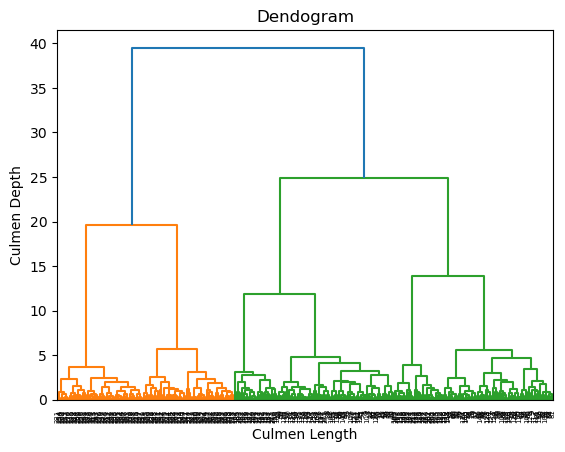

In [29]:
dendorgram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title("Dendogram")
plt.xlabel("Culmen Length")
plt.ylabel("Culmen Depth")
plt.show();

### Training the Hierarchical Clustering model on the dataset

In [30]:
agg = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage = "ward")
y_agg = agg.fit_predict(X)

In [31]:
X

array([[-0.89772327,  0.77726336, -1.43310124, -0.57223347, -0.98518437],
       [-0.82426521,  0.11703673, -1.07591481, -0.50992298,  1.01503844],
       [-0.67734909,  0.42175671, -0.43297924, -1.19533834,  1.01503844],
       ...,
       [ 1.17746691, -0.74633656,  1.49582747,  1.920186  , -0.98518437],
       [ 0.22251214, -1.20341653,  0.78145461,  1.23477065,  1.01503844],
       [ 1.08564434, -0.5431899 ,  0.8528919 ,  1.4840126 , -0.98518437]])

In [32]:
df

,0,1,2,3,4,cluster
0,-0.897723,0.777263,-1.433101,-0.572233,-0.985184,2
1,-0.824265,0.117037,-1.075915,-0.509923,1.015038,0
2,-0.677349,0.421757,-0.432979,-1.195338,1.015038,0
3,-1.338472,1.081983,-0.575854,-0.946096,1.015038,0
4,-0.860994,1.742210,-0.790166,-0.696854,-0.985184,2
...,...,...,...,...,...,...
330,0.589802,-1.762070,0.924329,0.892063,1.015038,3
331,0.516344,-1.457350,0.995766,0.798597,1.015038,3
332,1.177467,-0.746337,1.495827,1.920186,-0.985184,1
333,0.222512,-1.203417,0.781455,1.234771,1.015038,3


Text(0, 0.5, 'culmen_depth_mm')

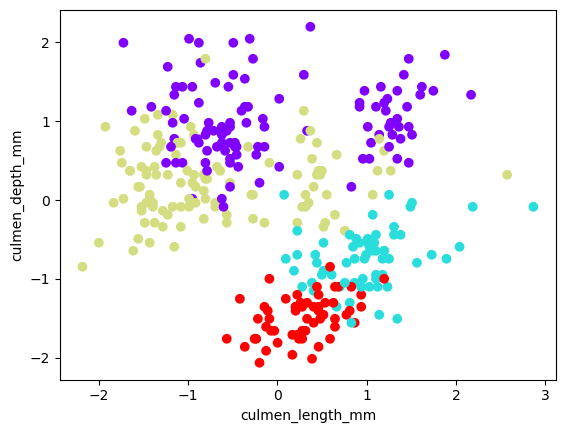

In [44]:
plt.scatter(df[0], df[1], c = y_agg, cmap = "rainbow")
plt.xlabel("culmen_length_mm")
plt.ylabel("culmen_depth_mm")

In [34]:
silhouette_avg = silhouette_score(df, y_agg)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5969785591768189
